In this study, I will try to predict the match outcomes, thus the standings in UEFA Champions League season 2020-2021 by developing a statistical model that uses player ratings (thus derived team ratings) to determine the outcome of the match.

![](http://www.sabcnews.com/sabcnews/wp-content/uploads/2018/10/SABC-News-UEFA_UEFA-website.png)

**1. Databases to be used:** 
* FIFA 19 player dataset
* 2018-2019 match results from top European Leagues (~3000 matches)

**2. Models to be developed:** 
* A predictor model will be developed using 2018-2019 match results and player dataset (we will be constructing team dataset using player attributes)
* After the model is complete it will be used to predict Champions League match outcomes using FIFA 19 player dataset
* My approach will be on categorisation of match outcomes (Home, Away, Draw) thus I will test KNN and Random Forest


Let's begin to see if your favorite team will win this year! 

In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\data.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [3]:
df = df.drop(df[['ID','Unnamed: 0','Value','Height','Weight','Age','Wage','Weak Foot','Special','Preferred Foot','Volleys',
                 'Curve', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 
                 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'International Reputation',
                 'Work Rate', 'Body Type','Photo','Nationality','Flag','Club Logo','Real Face','Jersey Number','Joined',
                 'Loaned From','Contract Valid Until','Release Clause']],axis=1)

In [4]:
df.describe()

,Overall,Potential,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,66.238699,71.307299,2.361308,49.734181,45.550911,52.298144,58.686712,55.371001,42.863153,52.711933,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,6.908930,6.136496,0.756164,18.364524,19.525820,17.379909,14.699495,18.910371,17.478763,15.327870,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,46.000000,48.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,3.000000,9.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,62.000000,67.000000,2.000000,38.000000,30.000000,44.000000,54.000000,49.000000,31.000000,43.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,71.000000,2.000000,54.000000,49.000000,56.000000,62.000000,61.000000,41.000000,56.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,71.000000,75.000000,3.000000,64.000000,62.000000,64.000000,68.000000,68.000000,57.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,94.000000,95.000000,5.000000,93.000000,95.000000,94.000000,93.000000,97.000000,94.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


We will keep goalkeeper statistics separate to calculate the overall of the clubs. Thus, categorising players into:
- Goalkeepers
- Others

Then, each player will have a new position and we will remove all other stats that belong to Position.

In [5]:
df['Player_Position'] = 0
df['Player_Position'][df['Position'] == 'GK'] = 'GK'
df.drop(['Position'], axis = 1, inplace = True)
gk = df[df['Player_Position'] == 'GK']
gk.head()

,Name,Overall,Potential,Club,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Player_Position
3,De Gea,91,93,Manchester United,1.0,17.0,13.0,21.0,50.0,18.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK
9,J. Oblak,90,93,Atlético Madrid,1.0,13.0,11.0,15.0,29.0,12.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,GK
18,M. ter Stegen,89,92,FC Barcelona,1.0,15.0,14.0,11.0,36.0,17.0,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,GK
19,T. Courtois,89,90,Real Madrid,1.0,14.0,14.0,13.0,33.0,13.0,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,GK
22,M. Neuer,89,89,FC Bayern München,1.0,15.0,13.0,25.0,55.0,30.0,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,GK


In [6]:
gk = gk.drop(['Name', 'Skill Moves', 'Crossing','Finishing','HeadingAccuracy','ShortPassing','Dribbling','FKAccuracy', 
              'LongPassing','BallControl','Acceleration','SprintSpeed', 'Agility', 'Balance', 'ShotPower', 'Strength',
              'LongShots','Interceptions','Positioning','Vision','Penalties','Marking','StandingTackle','SlidingTackle',
              'Aggression','Stamina'], axis=1)
gk.columns = [str(col) + ' GK' for col in gk.columns]
gk.rename(columns={'Club GK' : 'Club'}, inplace = True)
gk.head()

,Overall GK,Potential GK,Club,Reactions GK,Jumping GK,Composure GK,GKDiving GK,GKHandling GK,GKKicking GK,GKPositioning GK,GKReflexes GK,Player_Position GK
3,91,93,Manchester United,90.0,67.0,68.0,90.0,85.0,87.0,88.0,94.0,GK
9,90,93,Atlético Madrid,86.0,76.0,70.0,86.0,92.0,78.0,88.0,89.0,GK
18,89,92,FC Barcelona,85.0,79.0,69.0,87.0,85.0,88.0,85.0,90.0,GK
19,89,90,Real Madrid,84.0,68.0,66.0,85.0,91.0,72.0,86.0,88.0,GK
22,89,89,FC Bayern München,84.0,77.0,70.0,90.0,86.0,91.0,87.0,87.0,GK


In [7]:
team_gk = gk.groupby('Club').mean().sort_values('Overall GK', ascending = False)
team_gk.head()

,Overall GK,Potential GK,Reactions GK,Jumping GK,Composure GK,GKDiving GK,GKHandling GK,GKKicking GK,GKPositioning GK,GKReflexes GK
Club,,,,,,,,,,
Manchester United,81.666667,82.333333,79.000000,67.666667,63.333333,80.666667,77.666667,80.666667,79.666667,84.000000
Juventus,80.333333,82.666667,74.333333,72.333333,64.666667,80.000000,78.666667,66.666667,79.333333,84.333333
Arsenal,79.333333,82.000000,73.666667,61.000000,60.666667,78.333333,77.666667,73.333333,79.333333,78.333333
Real Madrid,79.250000,81.750000,74.000000,68.500000,57.250000,78.500000,78.250000,71.750000,77.750000,79.000000
Villarreal CF,78.666667,79.000000,76.333333,71.000000,58.666667,80.666667,75.666667,73.666667,76.333333,80.000000


In [9]:
not_gk = df[df['Player_Position'] != 'GK']
not_gk.columns

Index(['Name', 'Overall', 'Potential', 'Club', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Player_Position'],
      dtype='object')

In [10]:
not_gk.drop(['Name', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace = True)
team_notgk = not_gk.groupby('Club').mean().sort_values('Overall', ascending = False)

In [11]:
team_notgk.head()

,Overall,Potential,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Club,,,,,,,,,,,,,,,,,,,,,
Juventus,82.545455,85.909091,3.136364,67.318182,56.727273,70.090909,75.681818,76.818182,56.000000,69.954545,...,64.227273,71.363636,69.545455,63.227273,69.545455,61.545455,79.590909,70.000000,68.909091,66.045455
Inter,81.050000,83.300000,3.250000,67.300000,59.900000,68.700000,76.250000,76.300000,54.250000,71.350000,...,66.500000,71.300000,68.050000,67.100000,70.500000,59.700000,77.550000,69.050000,66.500000,64.050000
Napoli,80.318182,83.590909,3.136364,67.545455,58.454545,62.181818,76.363636,76.045455,55.136364,69.636364,...,65.636364,67.772727,64.227273,64.772727,67.909091,56.454545,74.454545,65.363636,65.818182,63.545455
Milan,78.739130,82.695652,3.260870,68.043478,54.608696,62.304348,76.000000,75.521739,56.086957,69.478261,...,63.478261,68.260870,63.869565,63.826087,66.782609,59.000000,74.652174,69.217391,62.826087,60.000000
FC Barcelona,78.620690,85.724138,3.103448,66.068966,60.793103,62.034483,77.620690,73.241379,57.172414,70.448276,...,64.241379,63.034483,62.344828,66.000000,70.689655,60.758621,75.068966,64.586207,63.241379,59.586207


In [12]:
teams = pd.merge(team_notgk, team_gk, 'right', 'Club')
teams

,Overall,Potential,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,FKAccuracy,LongPassing,...,Overall GK,Potential GK,Reactions GK,Jumping GK,Composure GK,GKDiving GK,GKHandling GK,GKKicking GK,GKPositioning GK,GKReflexes GK
Club,,,,,,,,,,,,,,,,,,,,,
Manchester United,76.800000,82.700000,3.233333,66.900000,60.600000,66.966667,74.233333,72.200000,57.666667,67.666667,...,81.666667,82.333333,79.000000,67.666667,63.333333,80.666667,77.666667,80.666667,79.666667,84.000000
Juventus,82.545455,85.909091,3.136364,67.318182,56.727273,70.090909,75.681818,76.818182,56.000000,69.954545,...,80.333333,82.666667,74.333333,72.333333,64.666667,80.000000,78.666667,66.666667,79.333333,84.333333
Arsenal,74.766667,81.333333,2.933333,61.833333,53.066667,60.700000,71.200000,68.133333,51.466667,62.766667,...,79.333333,82.000000,73.666667,61.000000,60.666667,78.333333,77.666667,73.333333,79.333333,78.333333
Real Madrid,78.103448,85.034483,3.103448,64.586207,58.586207,63.379310,75.241379,71.137931,56.655172,66.793103,...,79.250000,81.750000,74.000000,68.500000,57.250000,78.500000,78.250000,71.750000,77.750000,79.000000
Villarreal CF,73.896552,77.931034,2.793103,61.931034,54.413793,62.689655,70.827586,65.965517,51.655172,63.172414,...,78.666667,79.000000,76.333333,71.000000,58.666667,80.666667,75.666667,73.666667,76.333333,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dalkurd FF,60.263158,63.368421,2.052632,44.842105,40.105263,51.684211,53.526316,51.947368,37.210526,48.842105,...,55.000000,66.500000,48.000000,53.000000,29.500000,55.500000,52.000000,55.000000,50.000000,59.500000
Limerick FC,54.647059,60.588235,2.117647,43.882353,39.705882,47.882353,48.705882,47.000000,42.117647,44.000000,...,53.500000,67.000000,45.500000,59.500000,38.000000,53.000000,50.500000,50.500000,53.000000,56.000000
Bray Wanderers,53.750000,62.300000,2.050000,45.100000,38.450000,52.500000,49.550000,47.750000,35.750000,45.550000,...,53.000000,64.666667,48.666667,56.333333,33.000000,53.000000,52.000000,52.333333,51.666667,54.333333


We have the results from the following leagues. The main reason choosing these leagues due to ability to find relevant statistics and the fact that Champions League includes most of its participants from those countries:
* English Premier League
* La Liga
* Serie A
* Bundesliga
* Belgium Pro League
* France Ligue 1
* Eredivisie
* Primeira Liga
* Turkish Super Lig

In [13]:
uk = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\UK.csv',sep=';',encoding='latin-1')
es = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\ES.csv',sep=';',encoding='latin-1')
it = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\IT.csv',sep=';',encoding='latin-1')
de = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\DE.csv',sep=';',encoding='latin-1')
be = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\BE.csv',sep=';',encoding='latin-1')
fr = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\FR.csv',sep=';',encoding='latin-1')
ne = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\NE.csv',sep=';',encoding='latin-1')
pt = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\PO.csv',sep=';',encoding='latin-1')
tr = pd.read_csv(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\TR.csv',sep=';',encoding='latin-1')

In [14]:
uk.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10.08.2018,Manchester United,Leicester City,2,1,H,1,0,H,...,Oca.79,17,-0.75,Oca.75,1.Tem,Þub.29,Þub.21,Oca.55,4.Tem,Tem.69
1,E0,11.08.2018,Bournemouth,Cardiff City,2,0,H,1,0,H,...,Oca.83,20,-0.75,2.Þub,Þub.13,1.Aðu,Oca.75,Oca.88,Mar.61,4.Tem
2,E0,11.08.2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,Oca.87,22,-0.25,Þub.18,2.Kas,Oca.81,Oca.77,Þub.62,Mar.38,2.Eyl
3,E0,11.08.2018,Huddersfield Town,Chelsea,0,3,A,0,2,A,...,Oca.84,23,1,Oca.84,1.Aðu,Þub.13,2.Haz,Tem.24,Mar.95,Oca.58
4,E0,11.08.2018,Newcastle United,Tottenham Hotspur,1,2,A,1,2,A,...,Oca.81,20,0.25,2.Þub,2.Ara,1.Aðu,Oca.76,Nis.74,Mar.53,Oca.89


In [15]:
es.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,17.08.2018,Real Betis,Levante UD,0,3,A,0,1,A,...,2.Haz,20,-0.75,Oca.89,Oca.85,2.Tem,2,Oca.59,Nis.42,May.89
1,SP1,17.08.2018,Girona FC,Real Valladolid CF,0,0,D,0,0,D,...,Oca.71,20,-0.75,2.Haz,2.Oca,1.Eyl,Oca.85,Oca.76,Mar.57,May.62
2,SP1,18.08.2018,FC Barcelona,Deportivo Alavés,3,0,H,0,0,D,...,Mar.18,19,-2.5,Oca.95,Oca.91,2,Oca.95,1.Oca,Kas.85,32.17
3,SP1,18.08.2018,RC Celta,RCD Espanyol,1,1,D,0,1,A,...,Oca.76,18,-0.75,Þub.26,Þub.18,Oca.74,Oca.71,Þub.18,Mar.26,Mar.85
4,SP1,18.08.2018,Villarreal CF,Sociedad,1,2,A,1,1,D,...,Oca.81,18,-0.25,Oca.76,Oca.74,Þub.23,Þub.14,Þub.32,Mar.21,Mar.53


We will only use HomeTeam, AwayTeam, FTHG (Full Time Home Goals), FTAG (Full Time Away Goals), FTR (Full Time Result). Thus, dropping all the remaining columns from the database.

In [16]:
allmat = uk.append([be,de,tr,es,ne,fr,pt,it])
allmat['Div'].unique()

array(['E0', 'B1', 'D1', 'T1', 'SP1', 'N1', 'F1', 'P1', 'I1'],
      dtype=object)

In [17]:
allmat = allmat[['HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
allmat

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Manchester United,Leicester City,2,1,H
1,Bournemouth,Cardiff City,2,0,H
2,Fulham,Crystal Palace,0,2,A
3,Huddersfield Town,Chelsea,0,3,A
4,Newcastle United,Tottenham Hotspur,1,2,A
...,...,...,...,...,...
375,Inter,Empoli,2,1,H
376,Roma,Parma,2,1,H
377,Sampdoria,Juventus,2,0,H
378,Spal,Milan,2,3,A


Here we can see that there are 2984 matches played in these leagues in 2018/2019 season. Now I want to integrate the attributes from FIFA 19 player database to match results dataframe.

Firstly, integrate the team attributes for home team and then the away team. Thus we need to make a copy of FIFA 19 dataset for each and name each column of two different dataset by adding a 'Home' and 'Away' prefix

In [18]:
HomeStats = teams.add_prefix('Home ').reset_index()
AwayStats = teams.add_prefix('Away ').reset_index()

In [19]:
HomeStats.head()

,Club,Home Overall,Home Potential,Home Skill Moves,Home Crossing,Home Finishing,Home HeadingAccuracy,Home ShortPassing,Home Dribbling,Home FKAccuracy,...,Home Overall GK,Home Potential GK,Home Reactions GK,Home Jumping GK,Home Composure GK,Home GKDiving GK,Home GKHandling GK,Home GKKicking GK,Home GKPositioning GK,Home GKReflexes GK
0,Manchester United,76.800000,82.700000,3.233333,66.900000,60.600000,66.966667,74.233333,72.200000,57.666667,...,81.666667,82.333333,79.000000,67.666667,63.333333,80.666667,77.666667,80.666667,79.666667,84.000000
1,Juventus,82.545455,85.909091,3.136364,67.318182,56.727273,70.090909,75.681818,76.818182,56.000000,...,80.333333,82.666667,74.333333,72.333333,64.666667,80.000000,78.666667,66.666667,79.333333,84.333333
2,Arsenal,74.766667,81.333333,2.933333,61.833333,53.066667,60.700000,71.200000,68.133333,51.466667,...,79.333333,82.000000,73.666667,61.000000,60.666667,78.333333,77.666667,73.333333,79.333333,78.333333
3,Real Madrid,78.103448,85.034483,3.103448,64.586207,58.586207,63.379310,75.241379,71.137931,56.655172,...,79.250000,81.750000,74.000000,68.500000,57.250000,78.500000,78.250000,71.750000,77.750000,79.000000
4,Villarreal CF,73.896552,77.931034,2.793103,61.931034,54.413793,62.689655,70.827586,65.965517,51.655172,...,78.666667,79.000000,76.333333,71.000000,58.666667,80.666667,75.666667,73.666667,76.333333,80.000000


In [20]:
AwayStats.head()

,Club,Away Overall,Away Potential,Away Skill Moves,Away Crossing,Away Finishing,Away HeadingAccuracy,Away ShortPassing,Away Dribbling,Away FKAccuracy,...,Away Overall GK,Away Potential GK,Away Reactions GK,Away Jumping GK,Away Composure GK,Away GKDiving GK,Away GKHandling GK,Away GKKicking GK,Away GKPositioning GK,Away GKReflexes GK
0,Manchester United,76.800000,82.700000,3.233333,66.900000,60.600000,66.966667,74.233333,72.200000,57.666667,...,81.666667,82.333333,79.000000,67.666667,63.333333,80.666667,77.666667,80.666667,79.666667,84.000000
1,Juventus,82.545455,85.909091,3.136364,67.318182,56.727273,70.090909,75.681818,76.818182,56.000000,...,80.333333,82.666667,74.333333,72.333333,64.666667,80.000000,78.666667,66.666667,79.333333,84.333333
2,Arsenal,74.766667,81.333333,2.933333,61.833333,53.066667,60.700000,71.200000,68.133333,51.466667,...,79.333333,82.000000,73.666667,61.000000,60.666667,78.333333,77.666667,73.333333,79.333333,78.333333
3,Real Madrid,78.103448,85.034483,3.103448,64.586207,58.586207,63.379310,75.241379,71.137931,56.655172,...,79.250000,81.750000,74.000000,68.500000,57.250000,78.500000,78.250000,71.750000,77.750000,79.000000
4,Villarreal CF,73.896552,77.931034,2.793103,61.931034,54.413793,62.689655,70.827586,65.965517,51.655172,...,78.666667,79.000000,76.333333,71.000000,58.666667,80.666667,75.666667,73.666667,76.333333,80.000000


In [21]:
set1 = pd.merge(allmat, HomeStats, 'left', left_on = 'HomeTeam', right_on = 'Club')
suprset = pd.merge(set1, AwayStats, 'left', left_on = 'AwayTeam', right_on = 'Club')
suprset

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Club_x,Home Overall,Home Potential,Home Skill Moves,Home Crossing,...,Away Overall GK,Away Potential GK,Away Reactions GK,Away Jumping GK,Away Composure GK,Away GKDiving GK,Away GKHandling GK,Away GKKicking GK,Away GKPositioning GK,Away GKReflexes GK
0,Manchester United,Leicester City,2,1,H,Manchester United,76.800000,82.700000,3.233333,66.900000,...,76.333333,77.333333,70.000000,63.333333,61.666667,76.333333,73.000000,72.000000,74.333333,79.000000
1,Bournemouth,Cardiff City,2,0,H,Bournemouth,69.689655,75.896552,2.724138,58.379310,...,70.000000,71.333333,66.000000,61.666667,57.333333,71.666667,65.000000,62.000000,71.000000,71.666667
2,Fulham,Crystal Palace,0,2,A,Fulham,69.250000,76.535714,2.642857,54.000000,...,74.333333,74.333333,67.000000,60.333333,56.666667,75.666667,74.666667,74.000000,73.000000,74.333333
3,Huddersfield Town,Chelsea,0,3,A,Huddersfield Town,69.103448,76.103448,2.655172,58.551724,...,71.750000,78.250000,67.750000,63.000000,52.750000,72.250000,69.000000,65.750000,70.250000,73.250000
4,Newcastle United,Tottenham Hotspur,1,2,A,Newcastle United,70.758621,77.448276,2.793103,57.620690,...,75.000000,79.500000,67.000000,69.250000,56.250000,76.750000,72.250000,69.500000,72.000000,77.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,Inter,Empoli,2,1,H,Inter,81.050000,83.300000,3.250000,67.300000,...,65.500000,73.500000,56.250000,54.500000,54.750000,66.500000,63.000000,61.500000,64.000000,68.500000
2980,Roma,Parma,2,1,H,Roma,77.869565,82.826087,2.956522,64.391304,...,71.000000,72.500000,68.000000,63.500000,59.000000,69.500000,71.000000,62.000000,70.500000,72.500000
2981,Sampdoria,Juventus,2,0,H,Sampdoria,72.666667,77.583333,3.000000,61.333333,...,80.333333,82.666667,74.333333,72.333333,64.666667,80.000000,78.666667,66.666667,79.333333,84.333333
2982,Spal,Milan,2,3,A,NaN,NaN,NaN,NaN,NaN,...,74.250000,81.750000,66.250000,65.500000,62.000000,76.500000,72.750000,66.000000,70.250000,79.000000


In [22]:
print(suprset[suprset['Club_x'].isna()]['HomeTeam'].unique()) 
print(suprset[suprset['Club_y'].isna()]['AwayTeam'].unique())

['FC Schalke 04 04' 'Beþiktaþ JK' 'Medipol Baþakþehir FK' 'Kasimpaþa SK'
 'Sociedad' 'Spal']
['FC Schalke 04 04' 'Kasimpaþa SK' 'Beþiktaþ JK' 'Medipol Baþakþehir FK'
 'Sociedad' 'Spal']


In [42]:
t1 = HomeStats[HomeStats.Club.str.contains('Kasimpaşa')]
t1

,Club,Home Overall,Home Potential,Home Skill Moves,Home Crossing,Home Finishing,Home HeadingAccuracy,Home ShortPassing,Home Dribbling,Home FKAccuracy,...,Home Overall GK,Home Potential GK,Home Reactions GK,Home Jumping GK,Home Composure GK,Home GKDiving GK,Home GKHandling GK,Home GKKicking GK,Home GKPositioning GK,Home GKReflexes GK
397,Kasimpaşa SK,68.6,72.5,2.55,55.4,50.8,58.75,63.25,63.35,46.25,...,62.666667,65.666667,54.0,56.666667,46.0,59.666667,60.333333,56.0,66.0,67.0


So we see that there are some teams whose names do not match with FIFA database, we need to make sure that they have the same name in both database. We need to amend their names on HomeStats and AwayStats databases

In [37]:
allmat['HomeTeam'] = allmat['HomeTeam'].replace('FC Schalke 04 04', 'FC Schalke 04')
allmat['AwayTeam'] =  allmat['AwayTeam'].replace('FC Schalke 04 04', 'FC Schalke 04')

allmat['HomeTeam'] =  allmat['HomeTeam'].replace('Medipol Baþakþehir FK', 'Medipol Başakşehir FK')
allmat['AwayTeam'] =  allmat['AwayTeam'].replace('Medipol Baþakþehir FK', 'Medipol Başakşehir FK')

allmat['HomeTeam'] = allmat['HomeTeam'].replace('Beþiktaþ JK', 'Beşiktaş JK')
allmat['AwayTeam'] = allmat['AwayTeam'].replace('Beþiktaþ JK', 'Beşiktaş JK')

allmat['HomeTeam'] = allmat['HomeTeam'].replace('Sociedad', 'Real Sociedad')
allmat['AwayTeam'] = allmat['AwayTeam'].replace('Sociedad', 'Real Sociedad')

allmat['HomeTeam'] = allmat['HomeTeam'].replace('Spal', 'SPAL')
allmat['AwayTeam'] = allmat['AwayTeam'].replace('Spal', 'SPAL')

allmat['HomeTeam'] = allmat['HomeTeam'].replace('Kasimpaþa SK', 'Kasimpaşa SK')
allmat['AwayTeam'] = allmat['AwayTeam'].replace('Kasimpaþa SK', 'Kasimpaşa SK')

In [43]:
t2 = allmat[allmat.AwayTeam.str.contains('Medipol')]
t2

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
17,Kasimpaşa SK,Medipol Başakşehir FK,2,1,H
34,BB Erzurumspor,Medipol Başakşehir FK,0,1,A
45,Bursaspor,Medipol Başakşehir FK,0,0,D
69,Fenerbahçe SK,Medipol Başakşehir FK,0,0,D
84,Atiker Konyaspor,Medipol Başakşehir FK,0,1,A
103,Çaykur Rizespor,Medipol Başakşehir FK,1,2,A
116,Göztepe SK,Medipol Başakşehir FK,0,2,A
133,MKE Ankaragücü,Medipol Başakşehir FK,0,1,A
144,Alanyaspor,Medipol Başakşehir FK,1,1,D
159,Trabzonspor,Medipol Başakşehir FK,2,4,A


In [44]:
set1 = pd.merge(allmat, HomeStats, how='left', left_on = 'HomeTeam', right_on = 'Club')
superset = pd.merge(set1, AwayStats, how='left', left_on = 'AwayTeam', right_on = 'Club')

print(superset[superset['Club_x'].isna()]['HomeTeam'].unique()) 
print(superset[superset['Club_y'].isna()]['AwayTeam'].unique())

[]
[]


In [45]:
superset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 2983
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HomeTeam               2984 non-null   object 
 1   AwayTeam               2984 non-null   object 
 2   FTHG                   2984 non-null   int64  
 3   FTAG                   2984 non-null   int64  
 4   FTR                    2984 non-null   object 
 5   Club_x                 2984 non-null   object 
 6   Home Overall           2984 non-null   float64
 7   Home Potential         2984 non-null   float64
 8   Home Skill Moves       2984 non-null   float64
 9   Home Crossing          2984 non-null   float64
 10  Home Finishing         2984 non-null   float64
 11  Home HeadingAccuracy   2984 non-null   float64
 12  Home ShortPassing      2984 non-null   float64
 13  Home Dribbling         2984 non-null   float64
 14  Home FKAccuracy        2984 non-null   float64
 15  Home

In [46]:
table = superset.drop(columns = ['Club_x', 'Club_y'])
table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home Overall,Home Potential,Home Skill Moves,Home Crossing,Home Finishing,...,Away Overall GK,Away Potential GK,Away Reactions GK,Away Jumping GK,Away Composure GK,Away GKDiving GK,Away GKHandling GK,Away GKKicking GK,Away GKPositioning GK,Away GKReflexes GK
0,Manchester United,Leicester City,2,1,H,76.800000,82.700000,3.233333,66.900000,60.600000,...,76.333333,77.333333,70.00,63.333333,61.666667,76.333333,73.000000,72.00,74.333333,79.000000
1,Bournemouth,Cardiff City,2,0,H,69.689655,75.896552,2.724138,58.379310,52.000000,...,70.000000,71.333333,66.00,61.666667,57.333333,71.666667,65.000000,62.00,71.000000,71.666667
2,Fulham,Crystal Palace,0,2,A,69.250000,76.535714,2.642857,54.000000,52.500000,...,74.333333,74.333333,67.00,60.333333,56.666667,75.666667,74.666667,74.00,73.000000,74.333333
3,Huddersfield Town,Chelsea,0,3,A,69.103448,76.103448,2.655172,58.551724,51.517241,...,71.750000,78.250000,67.75,63.000000,52.750000,72.250000,69.000000,65.75,70.250000,73.250000
4,Newcastle United,Tottenham Hotspur,1,2,A,70.758621,77.448276,2.793103,57.620690,54.034483,...,75.000000,79.500000,67.00,69.250000,56.250000,76.750000,72.250000,69.50,72.000000,77.500000


In [47]:
table['FTR'] = table['FTR'].replace(['H','A','D'],[1,2,0])
table

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home Overall,Home Potential,Home Skill Moves,Home Crossing,Home Finishing,...,Away Overall GK,Away Potential GK,Away Reactions GK,Away Jumping GK,Away Composure GK,Away GKDiving GK,Away GKHandling GK,Away GKKicking GK,Away GKPositioning GK,Away GKReflexes GK
0,Manchester United,Leicester City,2,1,1,76.800000,82.700000,3.233333,66.900000,60.600000,...,76.333333,77.333333,70.000000,63.333333,61.666667,76.333333,73.000000,72.000000,74.333333,79.000000
1,Bournemouth,Cardiff City,2,0,1,69.689655,75.896552,2.724138,58.379310,52.000000,...,70.000000,71.333333,66.000000,61.666667,57.333333,71.666667,65.000000,62.000000,71.000000,71.666667
2,Fulham,Crystal Palace,0,2,2,69.250000,76.535714,2.642857,54.000000,52.500000,...,74.333333,74.333333,67.000000,60.333333,56.666667,75.666667,74.666667,74.000000,73.000000,74.333333
3,Huddersfield Town,Chelsea,0,3,2,69.103448,76.103448,2.655172,58.551724,51.517241,...,71.750000,78.250000,67.750000,63.000000,52.750000,72.250000,69.000000,65.750000,70.250000,73.250000
4,Newcastle United,Tottenham Hotspur,1,2,2,70.758621,77.448276,2.793103,57.620690,54.034483,...,75.000000,79.500000,67.000000,69.250000,56.250000,76.750000,72.250000,69.500000,72.000000,77.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,Inter,Empoli,2,1,1,81.050000,83.300000,3.250000,67.300000,59.900000,...,65.500000,73.500000,56.250000,54.500000,54.750000,66.500000,63.000000,61.500000,64.000000,68.500000
2980,Roma,Parma,2,1,1,77.869565,82.826087,2.956522,64.391304,55.434783,...,71.000000,72.500000,68.000000,63.500000,59.000000,69.500000,71.000000,62.000000,70.500000,72.500000
2981,Sampdoria,Juventus,2,0,1,72.666667,77.583333,3.000000,61.333333,50.708333,...,80.333333,82.666667,74.333333,72.333333,64.666667,80.000000,78.666667,66.666667,79.333333,84.333333
2982,SPAL,Milan,2,3,2,72.217391,75.695652,2.695652,57.434783,50.478261,...,74.250000,81.750000,66.250000,65.500000,62.000000,76.500000,72.750000,66.000000,70.250000,79.000000


So that we have the all match data ready (around 3000 matches and 81 columns atributed a match), it is now time to build our first model. 

### Model selection:
**1. KNN Model**   
First, we will build a k-NN model since we have the categorical data (Home, Away, Draw). Other models could be used in a further study such as linear regression to determine how many goals teams would score or a decision tree models.

I will drop Total Goals scored columns since it directly affects the outcome of the match

In [48]:
table_knn = table.iloc[:,4:] 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(table_knn.iloc[:,1:])
scaled_feat = scaler.transform(table_knn.iloc[:,1:])

knn_feat = pd.DataFrame(scaled_feat,columns = table_knn.iloc[:,1:].columns)

X = knn_feat
y = table_knn['FTR']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 62 113  41]
 [ 79 279  59]
 [ 51 106 106]]
              precision    recall  f1-score   support

           0       0.32      0.29      0.30       216
           1       0.56      0.67      0.61       417
           2       0.51      0.40      0.45       263

    accuracy                           0.50       896
   macro avg       0.47      0.45      0.46       896
weighted avg       0.49      0.50      0.49       896



We achieve an accuracy of 46%. A good practice of choosing k in kNN is the square root of number of feauters. Lets find a near optimal value for k by evaluating the error rate graph and see which k value will generate the least error rate.

Text(0.5, 1.0, 'Error Rate vs. K Value')

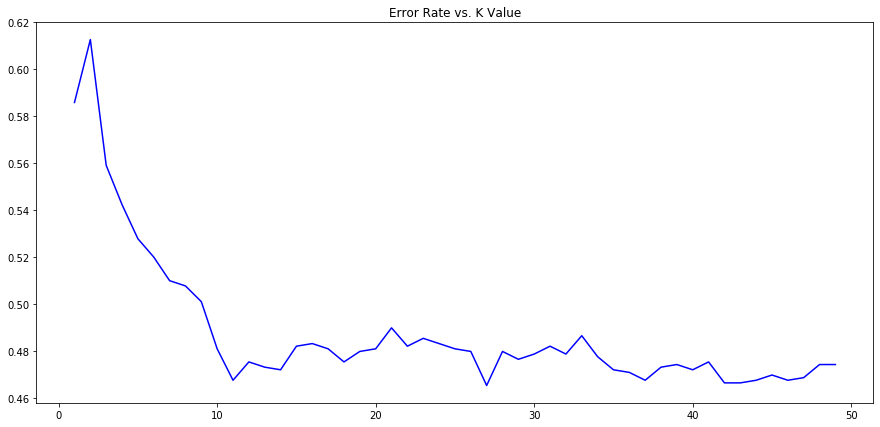

In [30]:
error_rate = []

for i in range(1,50):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,7))
plt.plot(range(1,50), error_rate,'b-')
plt.title('Error Rate vs. K Value')

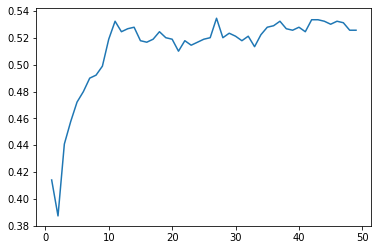

In [31]:
from sklearn import metrics
scores = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(range(1,50), scores)

As expected, the highest accuracy happens at k = 11

In [51]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 57 119  40]
 [ 60 304  53]
 [ 40 107 116]]
              precision    recall  f1-score   support

           0       0.36      0.26      0.31       216
           1       0.57      0.73      0.64       417
           2       0.56      0.44      0.49       263

    accuracy                           0.53       896
   macro avg       0.50      0.48      0.48       896
weighted avg       0.52      0.53      0.52       896



From the confusion matrix above, we see that our model's accuracy rised to 53% from 50%

**2. Random Forest Tree** 

In [54]:
from sklearn.model_selection import train_test_split 
X = table.iloc[:,5:]
y = table.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators' : [50, 100, 200], 'max_features' : [9, 18, 27]}
rfc = RandomForestClassifier()
gs_clf = GridSearchCV(rfc, param_grid = grid, verbose = 5)

In [64]:
gs_clf.fit(X_train, y_train)
print(gs_clf.best_params_, gs_clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_features=9, n_estimators=50 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_features=9, n_estimators=50, score=0.460, total=   1.2s
[CV] max_features=9, n_estimators=50 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ..... max_features=9, n_estimators=50, score=0.467, total=   1.3s
[CV] max_features=9, n_estimators=50 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ..... max_features=9, n_estimators=50, score=0.463, total=   1.2s
[CV] max_features=9, n_estimators=50 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV] ..... max_features=9, n_estimators=50, score=0.522, total=   1.3s
[CV] max_features=9, n_estimators=50 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s


[CV] ..... max_features=9, n_estimators=50, score=0.470, total=   1.3s
[CV] max_features=9, n_estimators=100 ................................
[CV] .... max_features=9, n_estimators=100, score=0.483, total=   2.7s
[CV] max_features=9, n_estimators=100 ................................
[CV] .... max_features=9, n_estimators=100, score=0.464, total=   2.2s
[CV] max_features=9, n_estimators=100 ................................
[CV] .... max_features=9, n_estimators=100, score=0.474, total=   2.2s
[CV] max_features=9, n_estimators=100 ................................
[CV] .... max_features=9, n_estimators=100, score=0.522, total=   2.2s
[CV] max_features=9, n_estimators=100 ................................
[CV] .... max_features=9, n_estimators=100, score=0.474, total=   2.2s
[CV] max_features=9, n_estimators=200 ................................
[CV] .... max_features=9, n_estimators=200, score=0.469, total=   4.4s
[CV] max_features=9, n_estimators=200 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.4min finished


{'max_features': 27, 'n_estimators': 200} 0.48890292360727344


In [262]:
from sklearn.metrics import classification_report,confusion_matrix

cf = RandomForestClassifier(n_estimators = 200, max_features = 18).fit(X_train,y_train)
pred = cf.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 33  72  37]
 [ 45 197  46]
 [ 23  60  84]]
              precision    recall  f1-score   support

           0       0.33      0.23      0.27       142
           1       0.60      0.68      0.64       288
           2       0.50      0.50      0.50       167

    accuracy                           0.53       597
   macro avg       0.48      0.47      0.47       597
weighted avg       0.51      0.53      0.51       597



We see that KNN is performing slightly better than Random Forest Model for our modelled data.

### UCL Group Stage Prediction

Applying the model to 2019-2020 dataset to check the prediction ability of the model.
Now, it is time to read UCL 2019/2020 groups into the dataset. Unfortunately, **Red Star FC and Zenit** are not present in our FIFA 19 dataset, thus their CL groups consist of three teams each in this study.

In [278]:
ucl = pd.read_excel(r'C:\Users\Pundeer\Desktop\Data Science\Kaggle\UEFA\ucl\clgroups1920.xlsx',header=0)
table1 = pd.merge(ucl, HomeStats,'left', left_on='HomeTeam',right_on='Club')
uclmatches = pd.merge(table1, AwayStats,'left',left_on='AwayTeam',right_on='Club')
uclmatches

,Group,HomeTeam,AwayTeam,Club_x,Home Overall,Home Potential,Home Skill Moves,Home Crossing,Home Finishing,Home HeadingAccuracy,...,Away Overall GK,Away Potential GK,Away Reactions GK,Away Jumping GK,Away Composure GK,Away GKDiving GK,Away GKHandling GK,Away GKKicking GK,Away GKPositioning GK,Away GKReflexes GK
0,A,Paris Saint-Germain,Real Madrid,Paris Saint-Germain,77.481481,83.518519,3.333333,68.518519,58.222222,64.407407,...,79.250000,81.750000,74.000000,68.500000,57.250000,78.50,78.250000,71.750000,77.750000,79.00
1,A,Club Brugge KV,Galatasaray SK,Club Brugge KV,71.840000,79.160000,2.800000,58.200000,54.800000,63.800000,...,68.333333,76.666667,59.000000,57.666667,44.000000,68.00,67.000000,65.000000,67.666667,71.00
2,A,Paris Saint-Germain,Club Brugge KV,Paris Saint-Germain,77.481481,83.518519,3.333333,68.518519,58.222222,64.407407,...,70.333333,76.333333,66.333333,56.000000,30.333333,75.00,65.333333,64.333333,68.000000,73.00
3,A,Real Madrid,Galatasaray SK,Real Madrid,78.103448,85.034483,3.103448,64.586207,58.586207,63.379310,...,68.333333,76.666667,59.000000,57.666667,44.000000,68.00,67.000000,65.000000,67.666667,71.00
4,A,Paris Saint-Germain,Galatasaray SK,Paris Saint-Germain,77.481481,83.518519,3.333333,68.518519,58.222222,64.407407,...,68.333333,76.666667,59.000000,57.666667,44.000000,68.00,67.000000,65.000000,67.666667,71.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H,LOSC Lille,Valencia CF,LOSC Lille,69.818182,79.045455,2.818182,59.590909,49.409091,57.590909,...,72.000000,79.250000,65.000000,72.250000,48.500000,74.50,68.000000,70.000000,67.250000,75.25
80,H,LOSC Lille,Chelsea,LOSC Lille,69.818182,79.045455,2.818182,59.590909,49.409091,57.590909,...,71.750000,78.250000,67.750000,63.000000,52.750000,72.25,69.000000,65.750000,70.250000,73.25
81,H,Ajax,Valencia CF,Ajax,73.428571,80.250000,3.071429,64.500000,59.821429,62.500000,...,72.000000,79.250000,65.000000,72.250000,48.500000,74.50,68.000000,70.000000,67.250000,75.25
82,H,Valencia CF,Chelsea,Valencia CF,75.068966,81.758621,2.931034,65.724138,58.517241,62.724138,...,71.750000,78.250000,67.750000,63.000000,52.750000,72.25,69.000000,65.750000,70.250000,73.25


In [279]:
uclmatches.drop(['Club_x','Club_y'], axis = 1, inplace = True)

In [280]:
scaler.fit(uclmatches.iloc[:,3:])
scaled_feat=scaler.transform(uclmatches.iloc[:,3:])
Xcl = pd.DataFrame(scaled_feat, columns = uclmatches.iloc[:,3:].columns)
pred_ucl = knn.predict(Xcl)

Lets take a look at group A for predicted outcomes :

In [281]:
uclmatches['Results'] = pred_ucl
uclresults = uclmatches[['Group ','HomeTeam','AwayTeam','Results']]
uclresults['Homepts'] = 0
uclresults['Awaypts'] = 0
uclresults['Homepts'][uclresults['Results']==1] = 3
uclresults['Awaypts'][uclresults['Results']==2] = 3
uclresults['Homepts'][uclresults['Results']==0] = 1 
uclresults['Awaypts'][uclresults['Results']==0] = 1

uclresults[uclresults['Group ']=='A']

,Group,HomeTeam,AwayTeam,Results,Homepts,Awaypts
0,A,Paris Saint-Germain,Real Madrid,1,3,0
1,A,Club Brugge KV,Galatasaray SK,0,1,1
2,A,Paris Saint-Germain,Club Brugge KV,1,3,0
3,A,Real Madrid,Galatasaray SK,1,3,0
4,A,Paris Saint-Germain,Galatasaray SK,1,3,0
5,A,Real Madrid,Club Brugge KV,1,3,0
6,A,Real Madrid,Paris Saint-Germain,1,3,0
7,A,Galatasaray SK,Club Brugge KV,0,1,1
8,A,Club Brugge KV,Paris Saint-Germain,1,3,0
9,A,Galatasaray SK,Real Madrid,2,0,3


In [282]:
hpts = uclresults.groupby(['Group ','HomeTeam']).sum()
hpts = hpts.drop(['Awaypts','Results'],axis=1)
apts = uclresults.groupby(['Group ','AwayTeam']).sum()
apts = apts.drop(['Homepts','Results'],axis=1)

In [283]:
hpts.reset_index(inplace=True)
apts.reset_index(inplace=True)
uclpred = pd.concat([hpts,apts],axis=1)

uclpred['Total Points'] = uclpred['Homepts'] + uclpred['Awaypts']
uclpred = uclpred.drop(columns=['Homepts','Awaypts','AwayTeam'],axis=1)
uclpred = uclpred.iloc[:,~uclpred.columns.duplicated()]
uclpred = uclpred.groupby(['Group ','HomeTeam']).sum()
uclpred#.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(4)

Total Points
Group  HomeTeam                          
A      Club Brugge KV                   8
       Galatasaray SK                   5
       Paris Saint-Germain              9
       Real Madrid                     12
B      FC Bayern München                6
       Olympiacos CFP                   1
       Tottenham Hotspur                8
C      Atalanta                         5
       Dinamo Zagreb                    7
       Manchester City                 13
       Shakhtar Donetsk                 9
D      Atlético Madrid                 10
       Bayer 04 Leverkusen              2
       Juventus                        18
       Lokomotiv Moscow                 4
E      FC Red Bull Salzburg             3
       KRC Genk                         3
       Liverpool                       15
       Napoli                          15
F      Borussia Dortmund               11
       FC Barcelona                     6
       Inter                            8
       SK Slavia Praha                  7
G      Olympique Lyonnais               4
       RB Leipzig                       2
       SL Benfica                       8
H      Ajax                             8
       Chelsea                         10
       LOSC Lille                       8
       Valencia CF                      6

### Group Stage Outcome

In [284]:
grp_result = uclpred.sort_values(['Group ', 'Total Points'],ascending=False).groupby('Group ').head(2)
grp_result

Total Points
Group  HomeTeam                         
H      Chelsea                        10
       Ajax                            8
G      SL Benfica                      8
       Olympique Lyonnais              4
F      Borussia Dortmund              11
       Inter                           8
E      Liverpool                      15
       Napoli                         15
D      Juventus                       18
       Atlético Madrid                10
C      Manchester City                13
       Shakhtar Donetsk                9
B      Tottenham Hotspur               8
       FC Bayern München               6
A      Real Madrid                    12
       Paris Saint-Germain             9

### Round of 16

**Draw procedure**  
- Two seeding pots are formed: one consisting of the eight group winners and the other of the eight runners-up. 
- No team can play a club from their own association/Group.
- Seeded group winners are away in the round of 16 first legs and at home in the return matches.

In [285]:
res = grp_result.reset_index().HomeTeam
seeded = []
unseed = []
for i in range(res.size) :
    if(i%2 == 0):
        seeded.append(res[i])
    else:
        unseed.append(res[i])
print(seeded, list(reversed(unseed)))

['Chelsea', 'SL Benfica', 'Borussia Dortmund', 'Liverpool', 'Juventus', 'Manchester City', 'Tottenham Hotspur', 'Real Madrid'] ['Paris Saint-Germain', 'FC Bayern München', 'Shakhtar Donetsk', 'Atlético Madrid', 'Napoli', 'Inter', 'Olympique Lyonnais', 'Ajax']


In [286]:
draw1 = pd.DataFrame([seeded, list(reversed(unseed))]).T
draw2 = pd.DataFrame([list(reversed(unseed)), seeded]).T
draw1.columns = ['R16Away', 'R16Home']
draw2.columns = ['R16Away', 'R16Home']
draw2

,R16Away,R16Home
0,Paris Saint-Germain,Chelsea
1,FC Bayern München,SL Benfica
2,Shakhtar Donetsk,Borussia Dortmund
3,Atlético Madrid,Liverpool
4,Napoli,Juventus
5,Inter,Manchester City
6,Olympique Lyonnais,Tottenham Hotspur
7,Ajax,Real Madrid


In [287]:
leg1 = pd.merge(draw1, HomeStats, how ='left', left_on='R16Home',right_on='Club')
r16leg1 = pd.merge(leg1, AwayStats, how ='left',left_on='R16Away',right_on='Club')

leg2 = pd.merge(draw2, HomeStats, how ='left', left_on='R16Home',right_on='Club')
r16leg2 = pd.merge(leg2, AwayStats, how ='left',left_on='R16Away',right_on='Club')

r16leg1.drop(['Club_x', 'Club_y'],  axis=1, inplace=True)
r16leg2.drop(['Club_x', 'Club_y'],  axis=1, inplace=True)
r16leg1

,R16Away,R16Home,Home Overall,Home Potential,Home Skill Moves,Home Crossing,Home Finishing,Home HeadingAccuracy,Home ShortPassing,Home Dribbling,...,Away Overall GK,Away Potential GK,Away Reactions GK,Away Jumping GK,Away Composure GK,Away GKDiving GK,Away GKHandling GK,Away GKKicking GK,Away GKPositioning GK,Away GKReflexes GK
0,Chelsea,Paris Saint-Germain,77.481481,83.518519,3.333333,68.518519,58.222222,64.407407,75.814815,74.666667,...,71.750000,78.250000,67.750000,63.000000,52.750000,72.250000,69.000000,65.750000,70.250000,73.250000
1,SL Benfica,FC Bayern München,77.720000,83.880000,3.160000,64.880000,59.760000,64.440000,74.400000,71.240000,...,72.333333,82.000000,71.333333,65.333333,37.333333,75.333333,65.666667,63.666667,70.000000,76.666667
2,Borussia Dortmund,Shakhtar Donetsk,73.160000,78.240000,3.040000,59.600000,57.920000,56.880000,70.880000,68.960000,...,75.000000,79.000000,71.666667,65.000000,44.000000,78.000000,72.666667,64.333333,71.333333,78.333333
3,Liverpool,Atlético Madrid,74.766667,82.333333,2.866667,62.000000,57.700000,65.200000,70.433333,67.900000,...,74.333333,81.666667,71.333333,57.666667,58.666667,74.333333,70.666667,67.000000,72.000000,76.666667
4,Juventus,Napoli,80.318182,83.590909,3.136364,67.545455,58.454545,62.181818,76.363636,76.045455,...,80.333333,82.666667,74.333333,72.333333,64.666667,80.000000,78.666667,66.666667,79.333333,84.333333
5,Manchester City,Inter,81.050000,83.300000,3.250000,67.300000,59.900000,68.700000,76.250000,76.300000,...,69.750000,78.500000,65.250000,64.500000,55.500000,69.750000,67.500000,72.500000,66.500000,71.500000
6,Tottenham Hotspur,Olympique Lyonnais,73.846154,82.230769,3.115385,60.115385,56.692308,63.153846,71.115385,71.576923,...,75.000000,79.500000,67.000000,69.250000,56.250000,76.750000,72.250000,69.500000,72.000000,77.500000
7,Real Madrid,Ajax,73.428571,80.250000,3.071429,64.500000,59.821429,62.500000,71.750000,71.285714,...,79.250000,81.750000,74.000000,68.500000,57.250000,78.500000,78.250000,71.750000,77.750000,79.000000


In [288]:
scaled_1 = scaler.transform(r16leg1.iloc[:,2:])
R16c1 = pd.DataFrame(scaled_1, columns = r16leg1.iloc[:,2:].columns)
pred_r16_l1 = knn.predict(R16c1)

scaled_2 = scaler.transform(r16leg2.iloc[:,2:])
R16c2 = pd.DataFrame(scaled_2, columns = r16leg2.iloc[:,2:].columns)
pred_r16_l2 = knn.predict(R16c2)

In [289]:
r16leg1['Results'] = pred_r16_l1
r16 = r16leg1[['R16Home','R16Away','Results']]
r16['Homepts'] = 0
r16['Awaypts'] = 0
r16['Homepts'][r16['Results']==1] = 3
r16['Awaypts'][r16['Results']==2] = 3
r16['Homepts'][r16['Results']==0] = 1 
r16['Awaypts'][r16['Results']==0] = 1
r16

,R16Home,R16Away,Results,Homepts,Awaypts
0,Paris Saint-Germain,Chelsea,1,3,0
1,FC Bayern München,SL Benfica,1,3,0
2,Shakhtar Donetsk,Borussia Dortmund,1,3,0
3,Atlético Madrid,Liverpool,2,0,3
4,Napoli,Juventus,2,0,3
5,Inter,Manchester City,0,1,1
6,Olympique Lyonnais,Tottenham Hotspur,0,1,1
7,Ajax,Real Madrid,0,1,1


In [290]:
r16leg2['Results'] = pred_r16_l2
r16_l2 = r16leg2[['R16Home','R16Away','Results']]
r16_l2['Homepts'] = 0
r16_l2['Awaypts'] = 0
r16_l2['Homepts'][r16_l2['Results']==1] = 3
r16_l2['Awaypts'][r16_l2['Results']==2] = 3
r16_l2['Homepts'][r16_l2['Results']==0] = 1 
r16_l2['Awaypts'][r16_l2['Results']==0] = 1
r16_l2

,R16Home,R16Away,Results,Homepts,Awaypts
0,Chelsea,Paris Saint-Germain,0,1,1
1,SL Benfica,FC Bayern München,0,1,1
2,Borussia Dortmund,Shakhtar Donetsk,1,3,0
3,Liverpool,Atlético Madrid,1,3,0
4,Juventus,Napoli,1,3,0
5,Manchester City,Inter,1,3,0
6,Tottenham Hotspur,Olympique Lyonnais,0,1,1
7,Real Madrid,Ajax,1,3,0


In [291]:
r16['h_total'] = r16.Homepts + r16_l2.Awaypts
r16['a_total'] = r16_l2.Homepts + r16.Awaypts
r16.drop(['Results', 'Homepts', 'Awaypts'], axis = 1, inplace = True)
r16

,R16Home,R16Away,h_total,a_total
0,Paris Saint-Germain,Chelsea,4,1
1,FC Bayern München,SL Benfica,4,1
2,Shakhtar Donetsk,Borussia Dortmund,3,3
3,Atlético Madrid,Liverpool,0,6
4,Napoli,Juventus,0,6
5,Inter,Manchester City,1,4
6,Olympique Lyonnais,Tottenham Hotspur,2,2
7,Ajax,Real Madrid,1,4


Here we observe that there are 2 ties, so we will manually consider penalty shootout rounds in favor of teams that actually made it to semifinals this year.

In [292]:
r16.loc[2, 'a_total'] += 1
r16.loc[6, 'h_total'] += 1
r16

,R16Home,R16Away,h_total,a_total
0,Paris Saint-Germain,Chelsea,4,1
1,FC Bayern München,SL Benfica,4,1
2,Shakhtar Donetsk,Borussia Dortmund,3,4
3,Atlético Madrid,Liverpool,0,6
4,Napoli,Juventus,0,6
5,Inter,Manchester City,1,4
6,Olympique Lyonnais,Tottenham Hotspur,3,2
7,Ajax,Real Madrid,1,4


In [293]:
quat = []
for i in range(8):
    if(r16.loc[i, 'h_total'] > r16.loc[i, 'a_total']):
        quat.append(r16.loc[i, 'R16Home'])
    else:
        quat.append(r16.loc[i, 'R16Away'])
quat

['Paris Saint-Germain',
 'FC Bayern München',
 'Borussia Dortmund',
 'Liverpool',
 'Juventus',
 'Manchester City',
 'Olympique Lyonnais',
 'Real Madrid']

### Quarter Finals

In [296]:
def knockout(finalist):
    n = len(finalist)
    set1 = []
    set2 = []
    for i in range(n//2):
        set1.append(finalist[i])
        set2.append(finalist[n -1 -i])
    df = pd.DataFrame({'H1' : set1, 'A1' : set2})
    leg = pd.merge(df, HomeStats, how ='left', left_on='H1',right_on='Club')
    final = pd.merge(leg, AwayStats, how ='left',left_on='A1',right_on='Club')
    final.drop(['Club_x', 'Club_y'],  axis=1, inplace=True)
    # Standard scaling the data
    scaled = scaler.transform(final.iloc[:,2:])
    R = pd.DataFrame(scaled, columns = final.iloc[:,2:].columns)
    pred_R = knn.predict(R)
    
    final['Results'] = pred_R
    r = final[['H1','A1','Results']]
    
    finalist1 = []
    for i in range(len(set1)):
        if(r.loc[i, 'Results'] < 2):
            finalist1.append(r.loc[i, 'H1'])
        else:
            finalist1.append(r.loc[i, 'A1'])
    
    return finalist1

In [297]:
semis = knockout(quat)
semis

['Paris Saint-Germain', 'FC Bayern München', 'Manchester City', 'Juventus']

### Semi-final

In [298]:
final = knockout(semis)
final

['Juventus', 'FC Bayern München']

### Finals 

In [299]:
finale = knockout(final)
finale

['Juventus']

### Conclusion

After various combinations of knockout fixtures, **Juventus** turns out to be the champion by our model for most cases. So, we will proudly present the winning trophy to Critiano Ronaldo, his dream could finally come true (just for this model).  
We see that out of all quarter finalist, four of them, **'Paris Saint-Germain', 'FC Bayern München', 'Manchester City', and 'Olympique Lyonnais'**, were actual quarter finalist in UCL 19-20. So our model predictions turns out to be 50% accurate.
The real **champions of UCL 19-20, team 'FC Bayern München'** was able to make it to the finals in our model as well.

***What was my aim in this study?***   
I wanted to build a statistical model using match results and team attributes, and use this model to predict Champions Leage 2019/2020 standings by predicting the outcome each game

***What could be further steps and development areas?***
Developing a different ML model: A Random Forest model to determine how much goals would be scored by each team in each game or other regression model could be applied to see the outcomes and the accuracy.